In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('spam.csv', encoding='latin-1')    

In [5]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns={'v1': 'label', 'v2': 'sms'}, inplace=True)

In [7]:
df.head(10)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y = lb.fit_transform(df['label'])
lb.classes_


array(['ham', 'spam'], dtype='<U4')

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['sms'], y, test_size=0.25, random_state=0)   

print(X_train,"\n")
print(y_train,"\n")

872                       I'll text you when I drop x off
831     Hi mate its RV did u hav a nice hol just a mes...
1273    network operator. The service is free. For T &...
3314    FREE MESSAGE Activate your 500 FREE Text Messa...
4929    Hi, the SEXYCHAT girls are waiting for you to ...
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: sms, Length: 4179, dtype: object 

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]] 



In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print(X_train_vectorized)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 32440 stored elements and shape (4179, 7094)>
  Coords	Values
  (0, 3808)	0.45226138087703516
  (0, 6221)	0.4986232853867042
  (0, 2291)	0.7394825641199166
  (1, 3140)	0.16328502857596408
  (1, 4011)	0.23128544838298973
  (1, 5367)	0.2917550565271726
  (1, 2139)	0.16217841366962418
  (1, 3079)	0.21577681546415847
  (1, 4360)	0.18981954987528013
  (1, 3175)	0.27807112370888937
  (1, 3547)	0.12633348544022577
  (1, 4079)	0.17532235527367968
  (1, 5427)	0.17324485450876895
  (1, 3118)	0.19714520144803133
  (1, 1901)	0.21760151556470655
  (1, 3082)	0.27807112370888937
  (1, 5514)	0.18449977305709003
  (1, 798)	0.26083140720138
  (1, 5903)	0.21953053949141355
  (1, 2288)	0.21760151556470655
  (1, 5914)	0.21953053949141355
  (1, 5307)	0.27807112370888937
  (1, 5368)	0.2917550565271726
  (2, 4344)	0.36075025553901185
  (2, 4528)	0.40365003871579797
  :	:
  (4176, 7084)	0.20721929600997868
  (4176, 7086)	0.23938319067657396
  (4176,

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()    
model.fit(X_train_vectorized, y_train.ravel())
y_pred = model.predict(X_test_vectorized)

for pred, y in zip(y_pred, y_test):
    print(f"Predicted: {pred}, Actual: {y}")  

Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 1, Actual: [1]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 1, Actual: [1]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 1, Actual: [1]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [1]
Predicted: 0, Actual: [0]
Predicted: 1, Actual: [1]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [1]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [1]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [1]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0, Actual: [0]
Predicted: 0

In [19]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", matrix)

Confusion Matrix: [[1195    1]
 [  60  137]]


In [20]:
tn ,fp, fn, tp = matrix.ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

True Negatives: 1195, False Positives: 1, False Negatives: 60, True Positives: 137


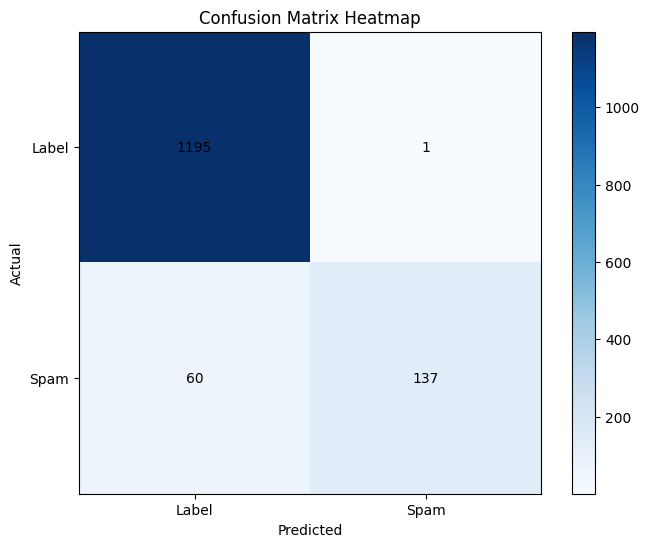

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.colorbar()

# Add labels to the axes
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Label', 'Spam'])
plt.yticks(tick_marks, ['Label', 'Spam'])

# Annotate the heatmap with the values
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, format(matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9562096195262024
Precision: 0.9927536231884058
Recall: 0.6954314720812182
F1 Score: 0.817910447761194


In [27]:
# Calculate training accuracy
y_train_pred = model.predict(X_train_vectorized)
training_accuracy = accuracy_score(y_train, y_train_pred)

# Print training and testing accuracy
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {accuracy}")

# Check for overfitting
if training_accuracy > accuracy + 0.1:
    print("The model might be overfitting.")
else:
    print("The model does not seem to be overfitting.")

Training Accuracy: 0.9681742043551089
Testing Accuracy: 0.9562096195262024
The model does not seem to be overfitting.


In [28]:
# Conclusion based on the evaluation metrics
print("Conclusion:")
print(f"The model achieved an accuracy of {accuracy:.2f}, indicating that it correctly classified {accuracy * 100:.2f}% of the messages.")
print(f"The precision of {precision:.2f} shows that when the model predicts a message as spam, it is correct {precision * 100:.2f}% of the time.")
print(f"The recall of {recall:.2f} indicates that the model identified {recall * 100:.2f}% of the actual spam messages.")
print(f"The F1 score of {f1:.2f} balances precision and recall, showing the overall effectiveness of the model.")
print("Overall, the model performs well, but there is room for improvement in recall to better identify spam messages.")

Conclusion:
The model achieved an accuracy of 0.96, indicating that it correctly classified 95.62% of the messages.
The precision of 0.99 shows that when the model predicts a message as spam, it is correct 99.28% of the time.
The recall of 0.70 indicates that the model identified 69.54% of the actual spam messages.
The F1 score of 0.82 balances precision and recall, showing the overall effectiveness of the model.
Overall, the model performs well, but there is room for improvement in recall to better identify spam messages.
